In [162]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [163]:
# Loading dataset from csv file to dataframe
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 27 variables including the features and target variables. In this dataset, we need to predict "primary_fuel" and "capacity_mw", so these two are our target variables.

In [164]:
# Checking hte dimension of dataset
df.shape

(907, 27)

In [165]:
# Checking the columns details
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [166]:
# Checking the dtypes of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see the dataset contains object and float datatype columns.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [168]:
# Checking for unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2,year_of_capacity_data and generation_data_source have only one unique value. Also other_feul3, wepp_id,generation_gwh_2013,generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values.We can drop these columns.

In [169]:
# Dropping irrelevant columns
df.drop(columns=["country","country_long","other_fuel2","other_fuel3","year_of_capacity_data","generation_data_source","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [170]:
# Checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [171]:
# Dropping name column
df.drop("name",axis=1,inplace=True)
#Name column has unique names for each power plant so we can drop this column

In [172]:
df.drop("owner",axis=1,inplace=True)
#The column owner has more than 65% null values. /so we can drop this column as it is irrelevant.

In [173]:
df.drop("gppd_idnr", axis=1,inplace=True)#url is also anirrelevent column

In [214]:
df.drop("url",axis=1,inplace=True)

In [215]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [175]:
# Checking for null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [176]:
# Filling null values using their median values
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [177]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())

In [178]:
# Filling null values using their mode values
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [179]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [180]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.815073,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

The median is bit greater than the mean in the column latitude which means it is skewed to left.

From the difference between the max and 75% percentile we can say that there are huge outliers present in most of the columns, will remove them before model building.

# Data Visualisation

In [181]:
# Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'url', 'geolocation_source']


In [182]:
# Checking for Continous columns
continous_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        continous_col.append(i)
print(continous_col)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

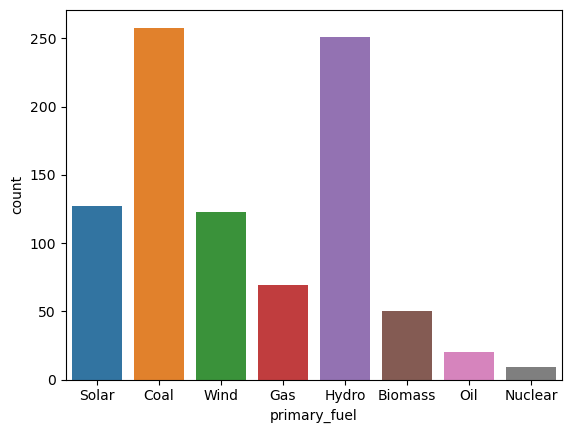

In [183]:
sns.countplot(x='primary_fuel',data=df)

Power Plants with primary fuel as 'Coal' and 'Hydro' are more in country.

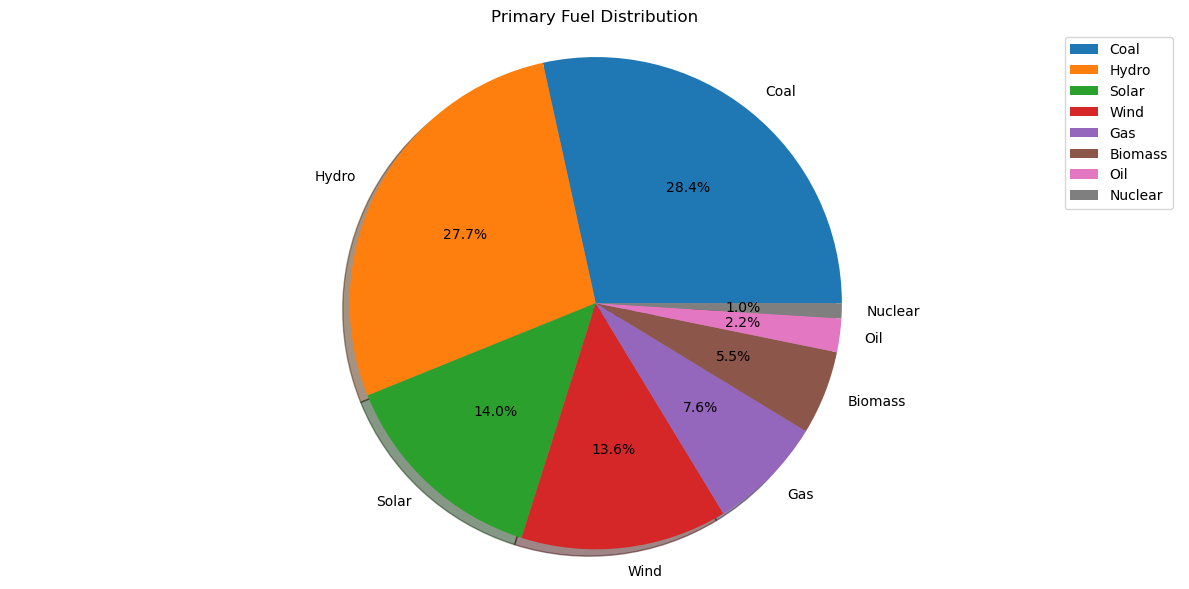

In [184]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df['primary_fuel'].value_counts(),labels=df['primary_fuel'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Primary Fuel Distribution')
plt.legend()
plt.legend(prop={'size':10})
plt.axis('equal')
plt.tight_layout()
plt.show()


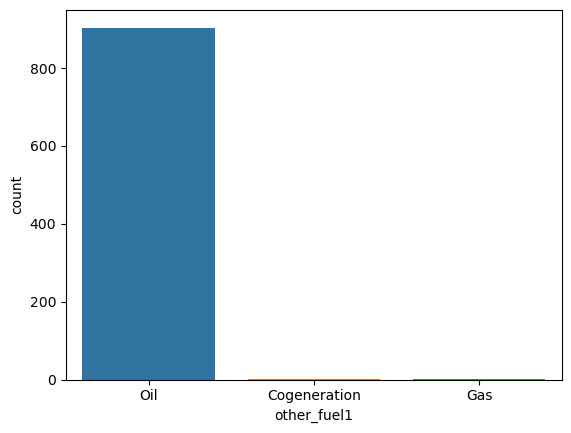

In [185]:
sns.countplot(df['other_fuel1'])
plt.show()

count of oil is high compare to Cogeneration and Gas

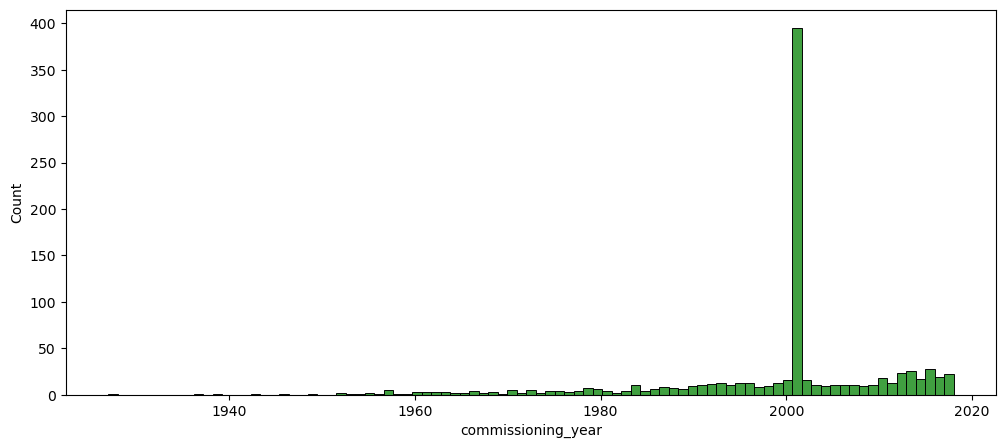

In [186]:
plt.figure(figsize=(12,5))
sns.histplot(df['commissioning_year'],color='green')
plt.show()

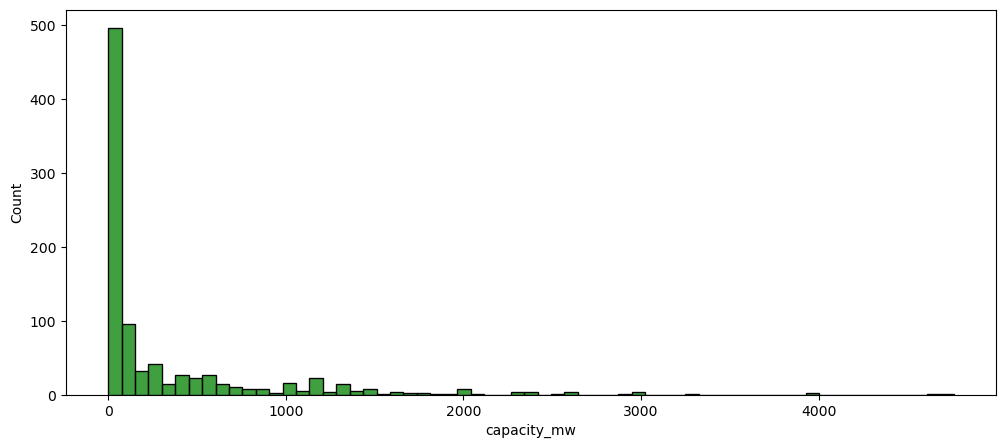

In [187]:
plt.figure(figsize=(12,5))
sns.histplot(df['capacity_mw'],color='g')
plt.show()

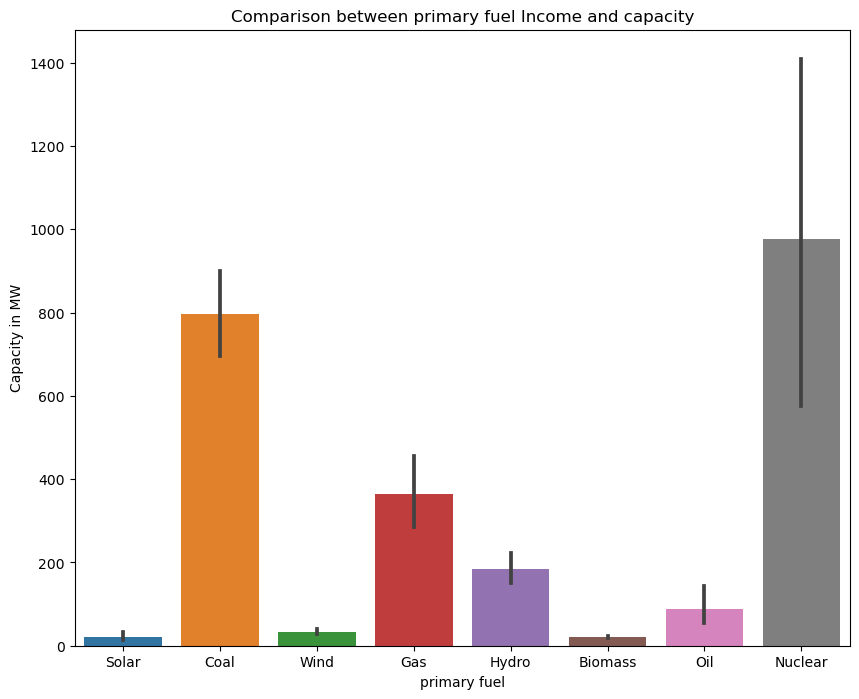

In [188]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and capacity")
sns.barplot(df['primary_fuel'],df['capacity_mw'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("Capacity in MW")
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.

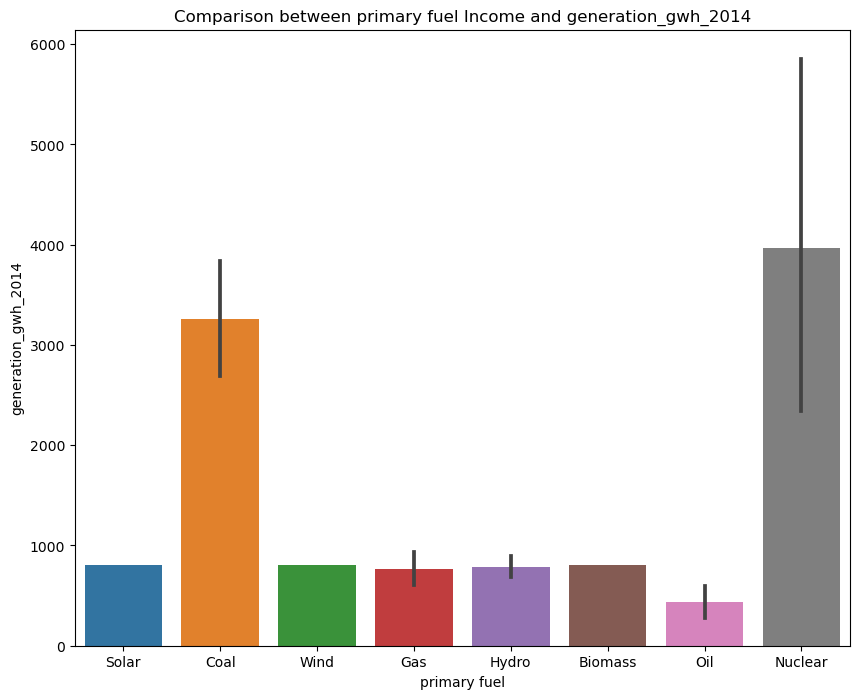

In [189]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2014")
sns.barplot(df['primary_fuel'],df['generation_gwh_2014'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2014")
plt.show()

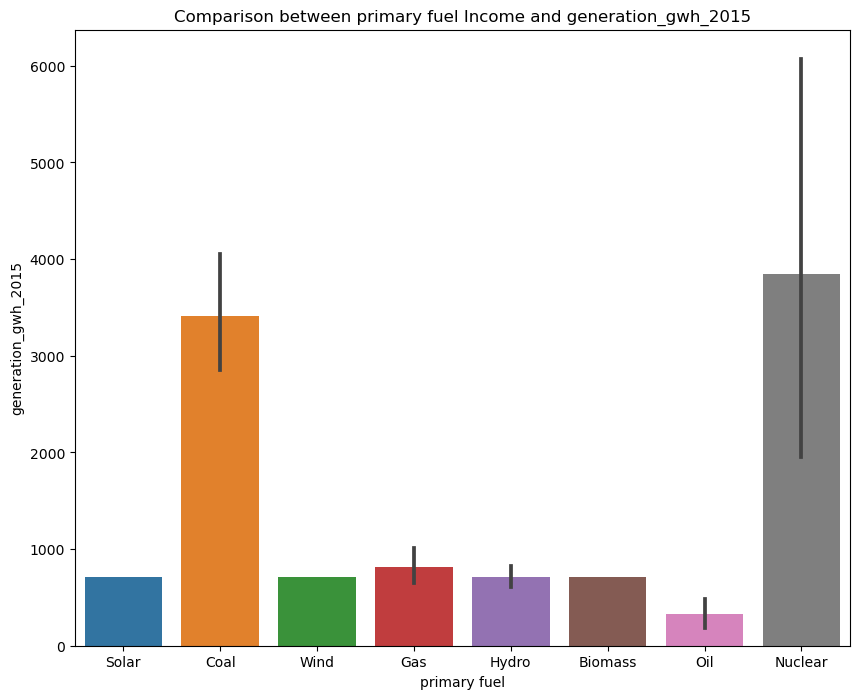

In [190]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2015")
sns.barplot(df['primary_fuel'],df['generation_gwh_2015'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2015")
plt.show()

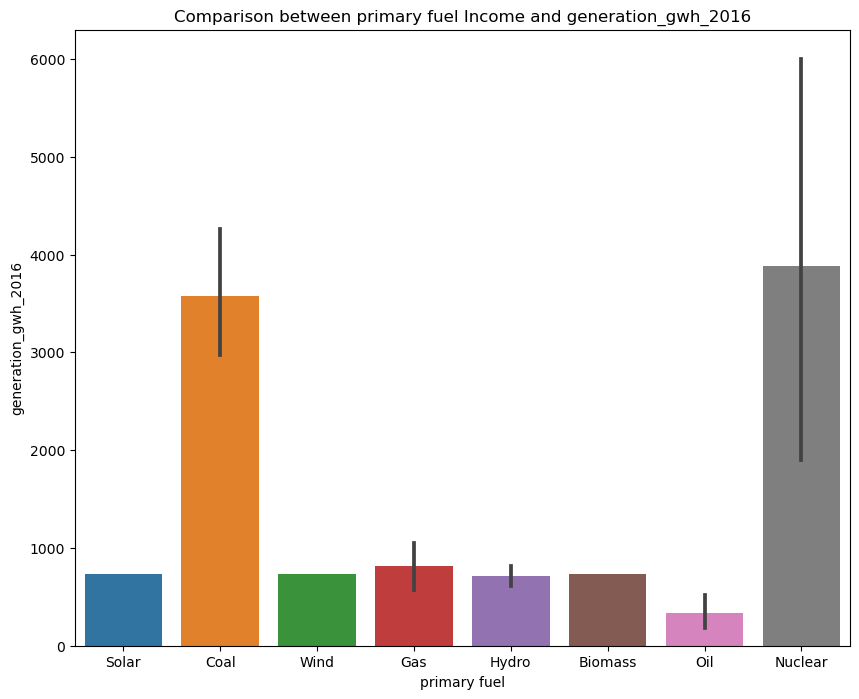

In [191]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2016")
sns.barplot(df['primary_fuel'],df['generation_gwh_2016'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2016")
plt.show()

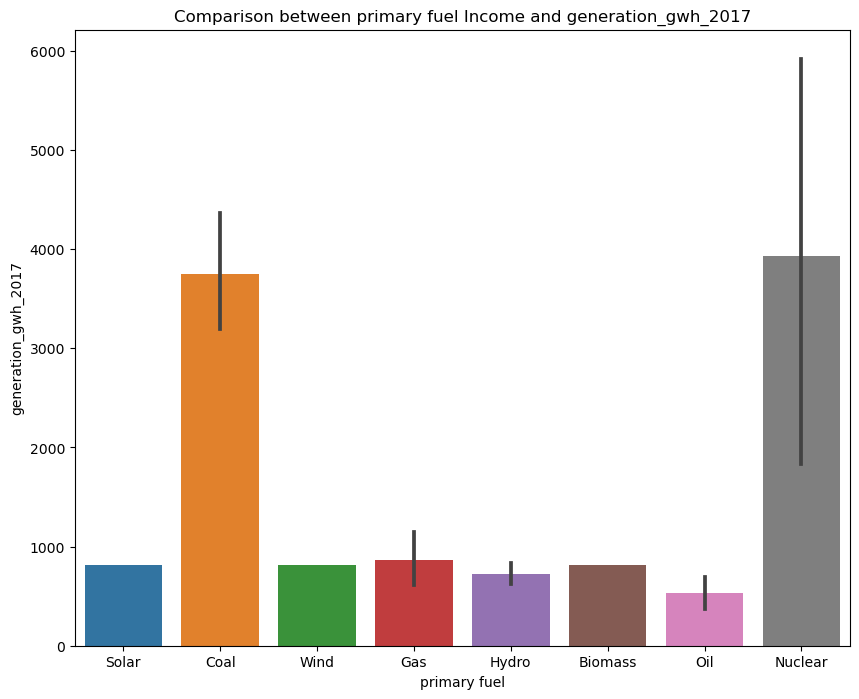

In [192]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2017")
sns.barplot(df['primary_fuel'],df['generation_gwh_2017'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2017")
plt.show()


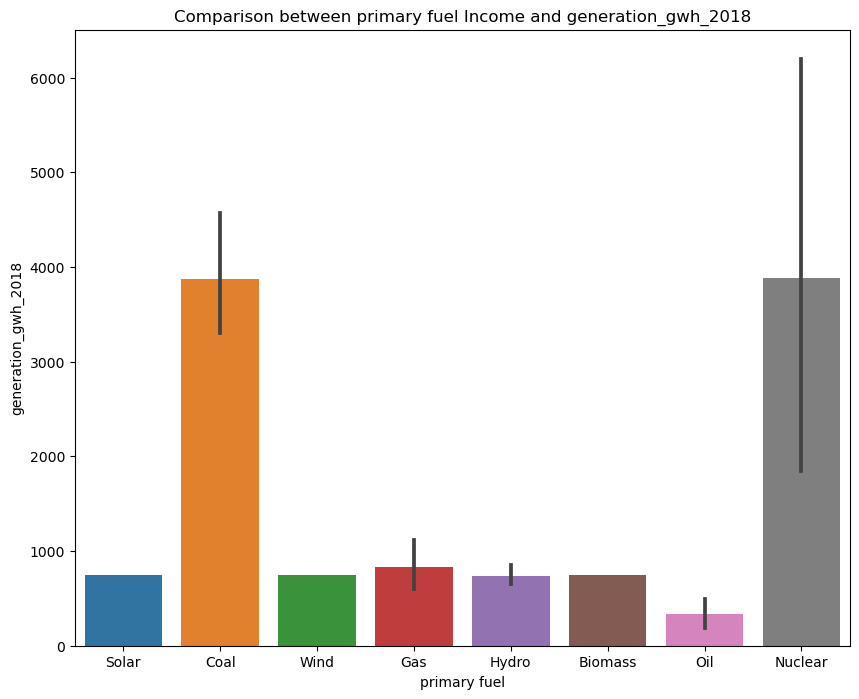

In [193]:
plt.figure(figsize=(10,8))
plt.title("Comparison between primary fuel Income and generation_gwh_2018")
sns.barplot(df['primary_fuel'],df['generation_gwh_2018'],data = df)
plt.xlabel("primary fuel")
plt.ylabel("generation_gwh_2018")
plt.show()

<AxesSubplot:title={'center':'Comparision between latitude and primary_fuel'}, xlabel='primary_fuel', ylabel='latitude'>

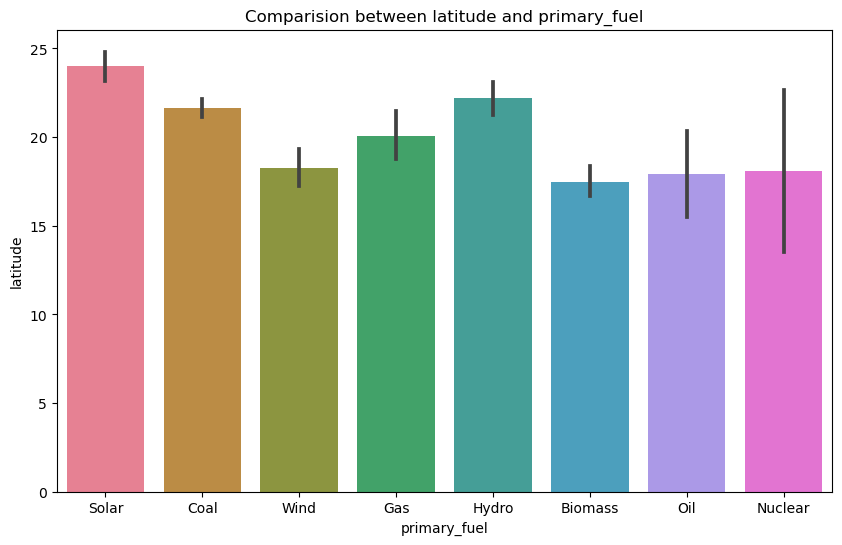

In [194]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl")

The primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas

<AxesSubplot:title={'center':'Comparision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

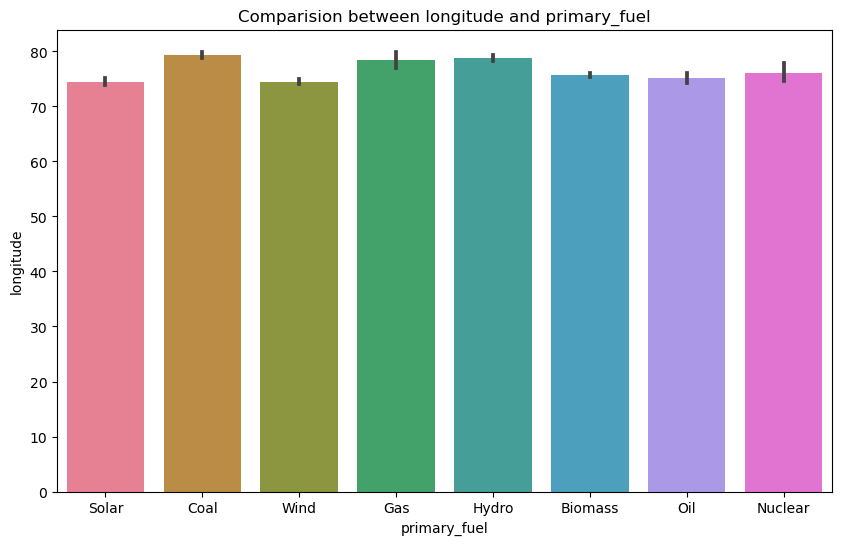

In [195]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["longitude"],palette="husl")

longitude has not much diferences in primary fuel

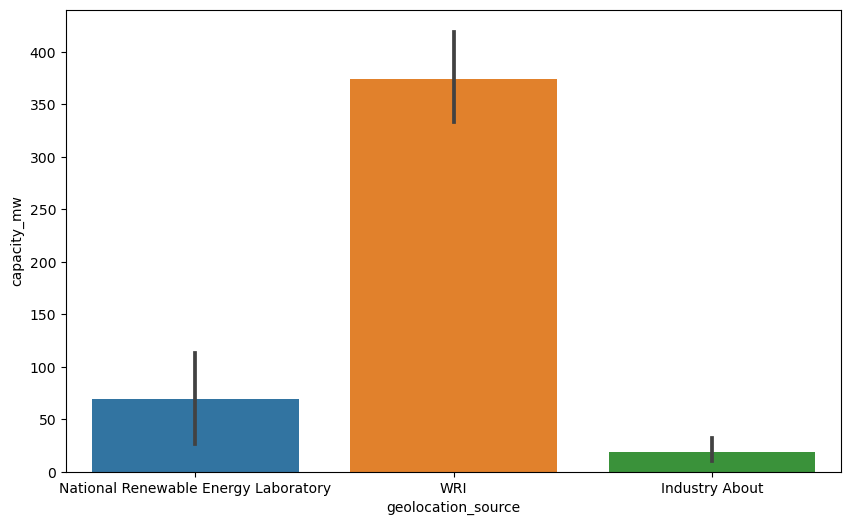

In [196]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geological source WRI is maximum 

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

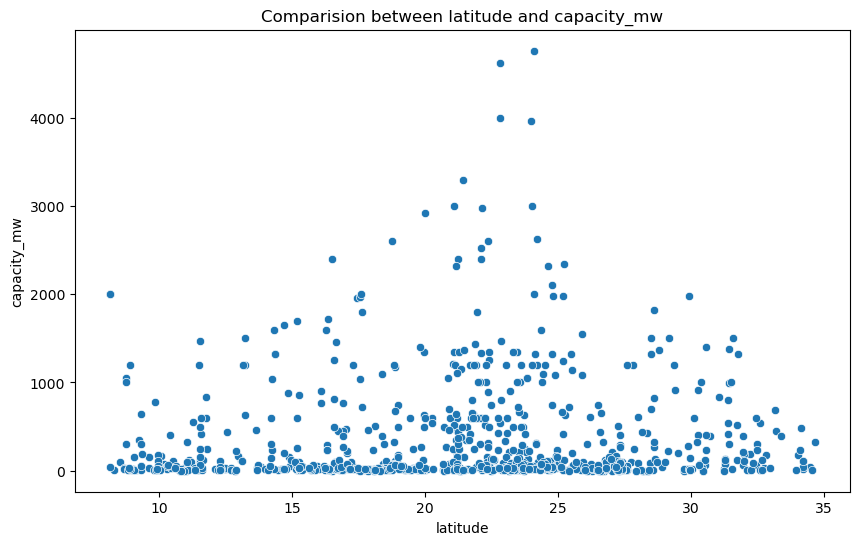

In [197]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

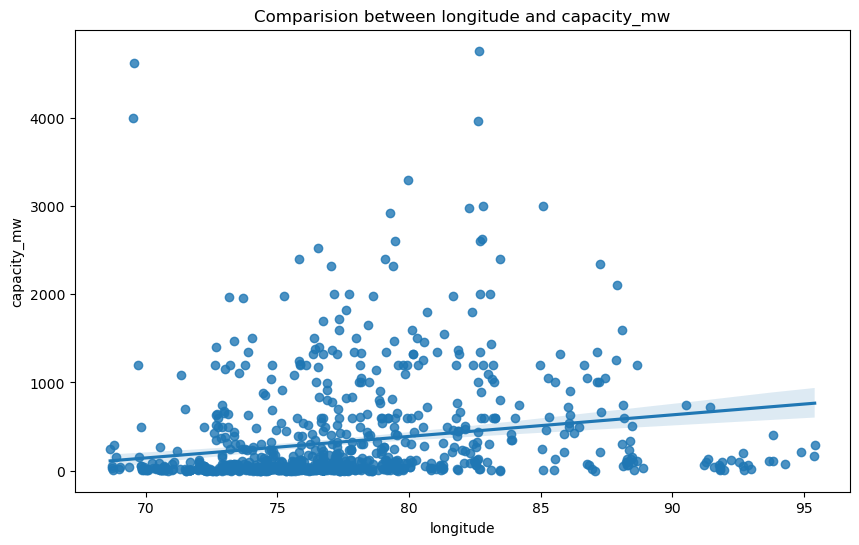

In [198]:
#Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"])

not much relation in latitude and longitude against capacity

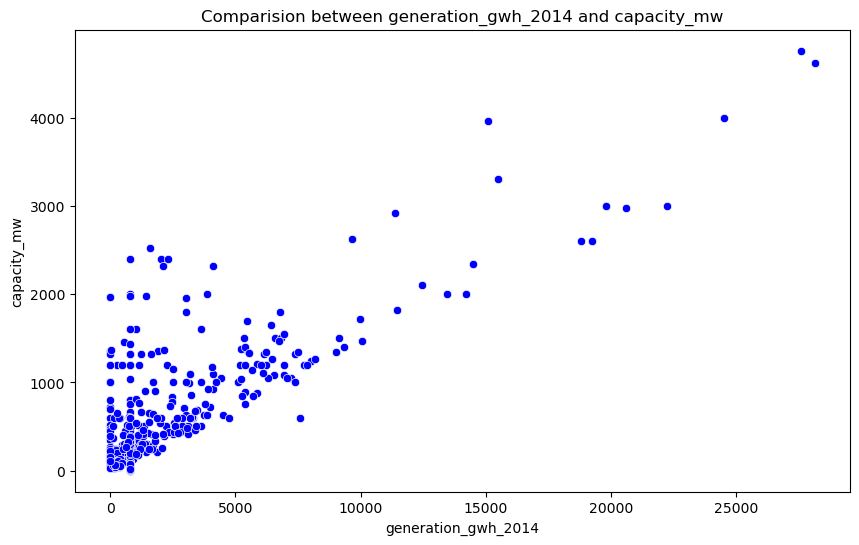

In [199]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="b")
plt.show()

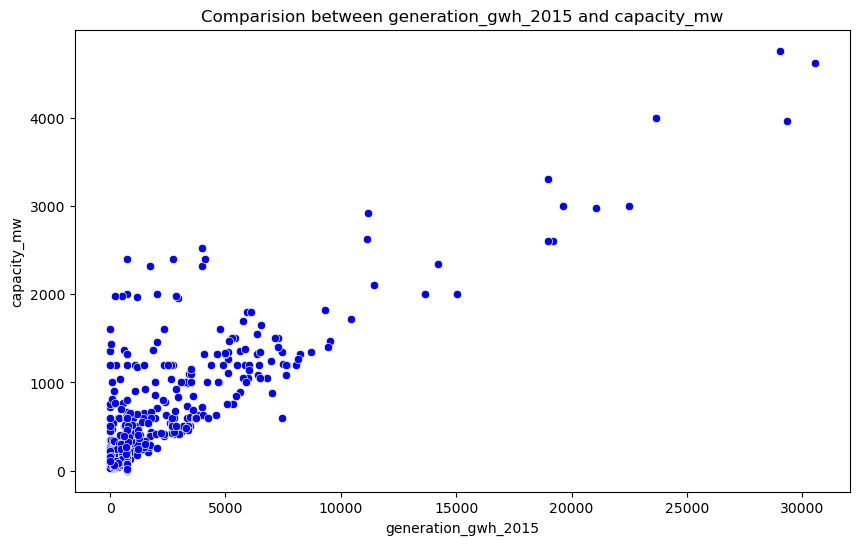

In [200]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2015 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df,color="b")
plt.show()

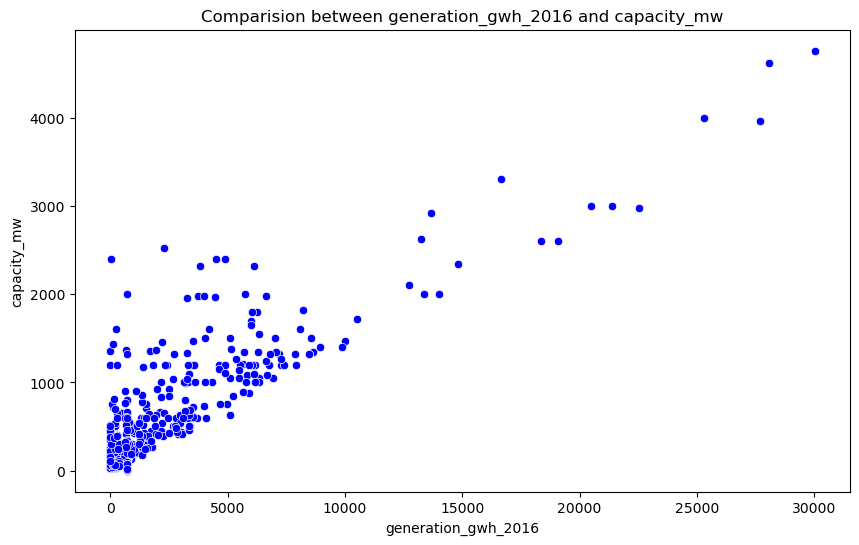

In [201]:
#Lets check the capacity of the plant in generation_gwh_2016
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2016 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df,color="b")
plt.show()

We can notice the linear relationship between the feature and the label. As the generation growth increases, the capacity of plant also increases.

In [202]:
#Now using encoder to encode the categorical column

from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
for i in categorical_col:
    df[i]=enc.fit_transform(df[i])
print(df.dtypes)

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
source                   int32
url                      int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object


In [203]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,128,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,173,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,205,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,58,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2001.0,77,22,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2,2001.0,21,260,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2,2001.0,59,82,2,801.123775,711.181225,737.205450,817.977250,751.644375


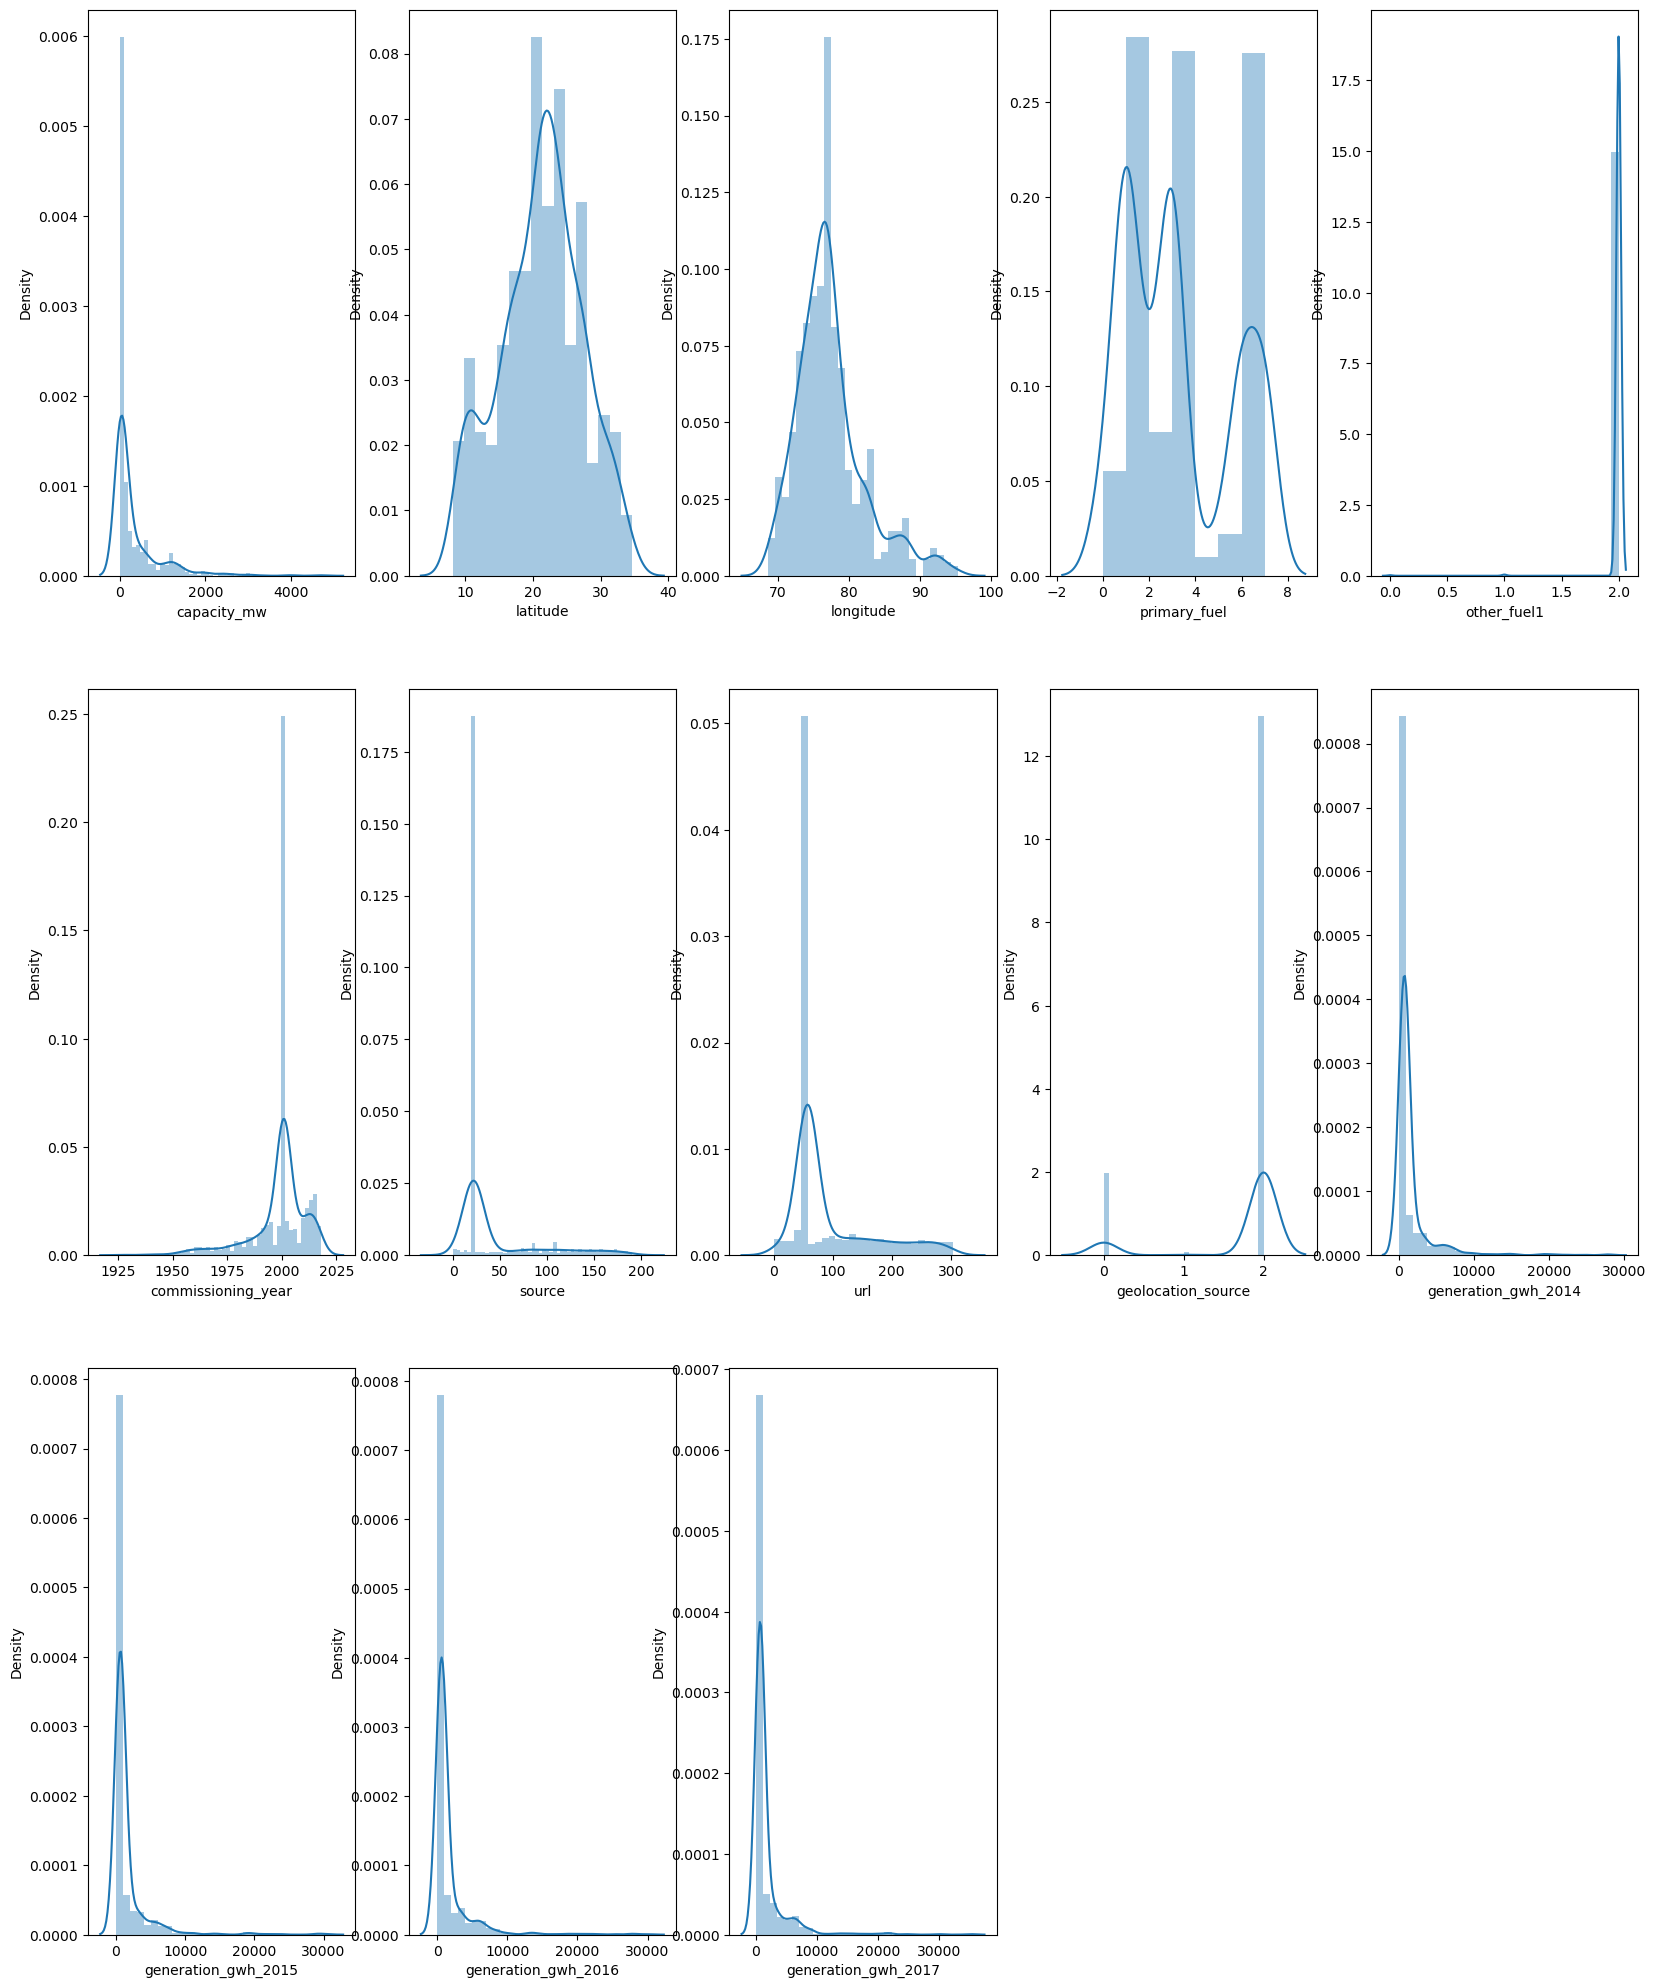

In [204]:
#lets see how our data point are distributed
plt.figure(figsize=(20,25),facecolor = 'w')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

there are outlier present we will remove it in further process

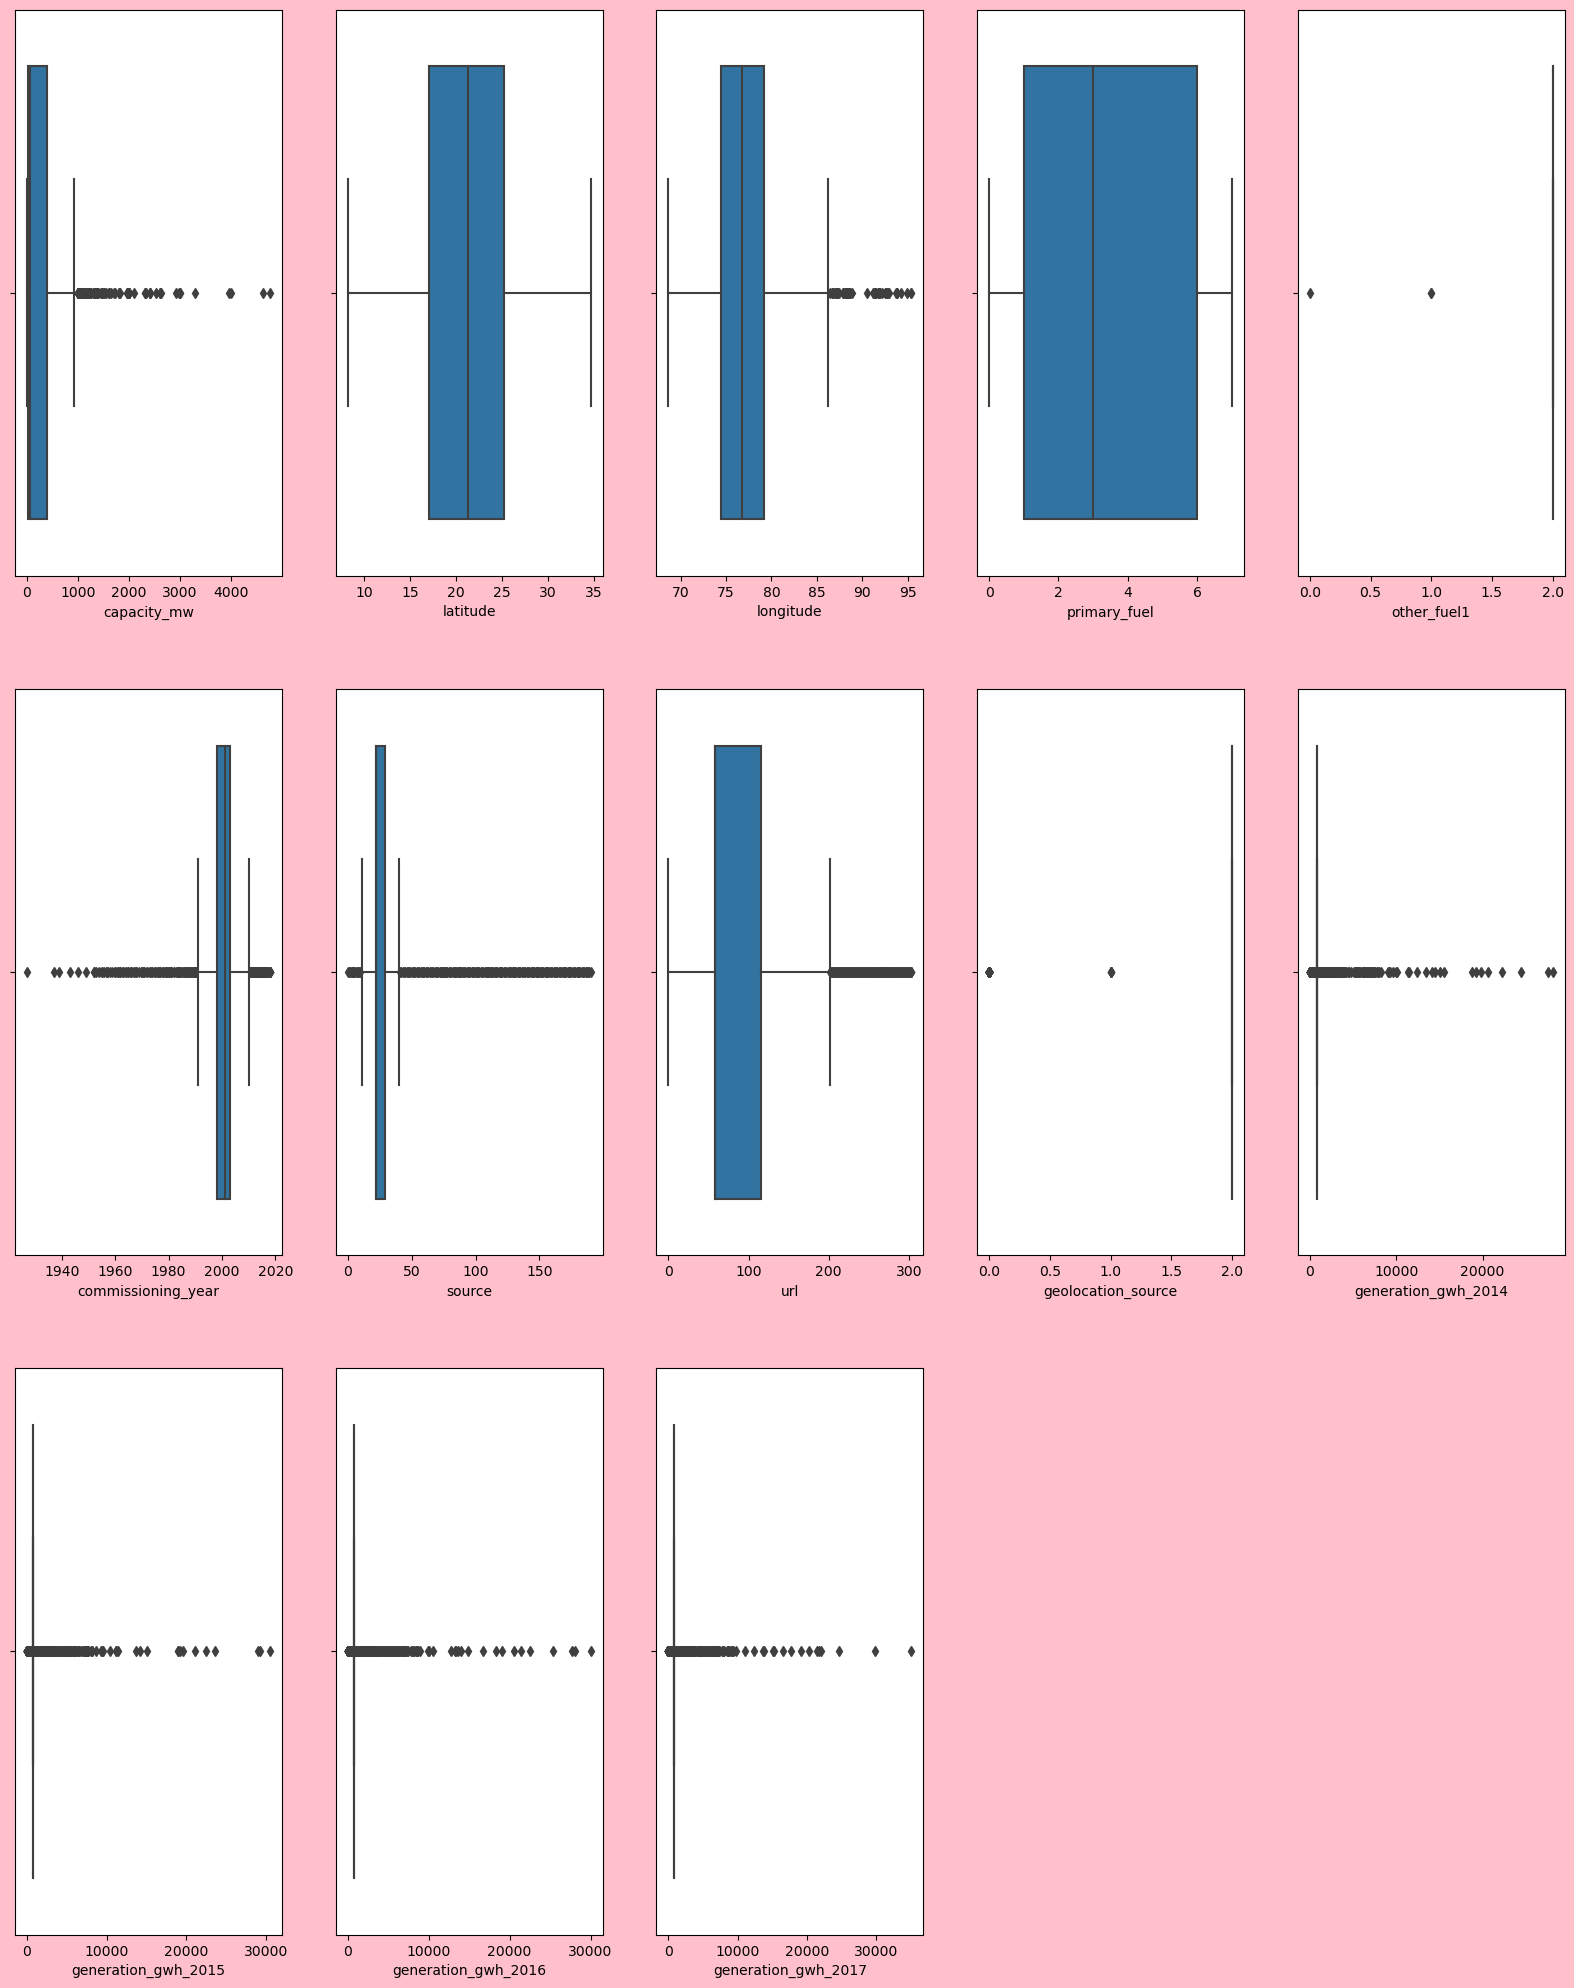

In [205]:
#checking outlier
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

In [217]:


df_outliers=df[["capacity_mw", "longitude", "other_fuel1","geolocation_source","generation_gwh_2014","generation_gwh_2015","commissioning_year","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]]
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_new=df[(z<3).all(axis=1)]

In [218]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


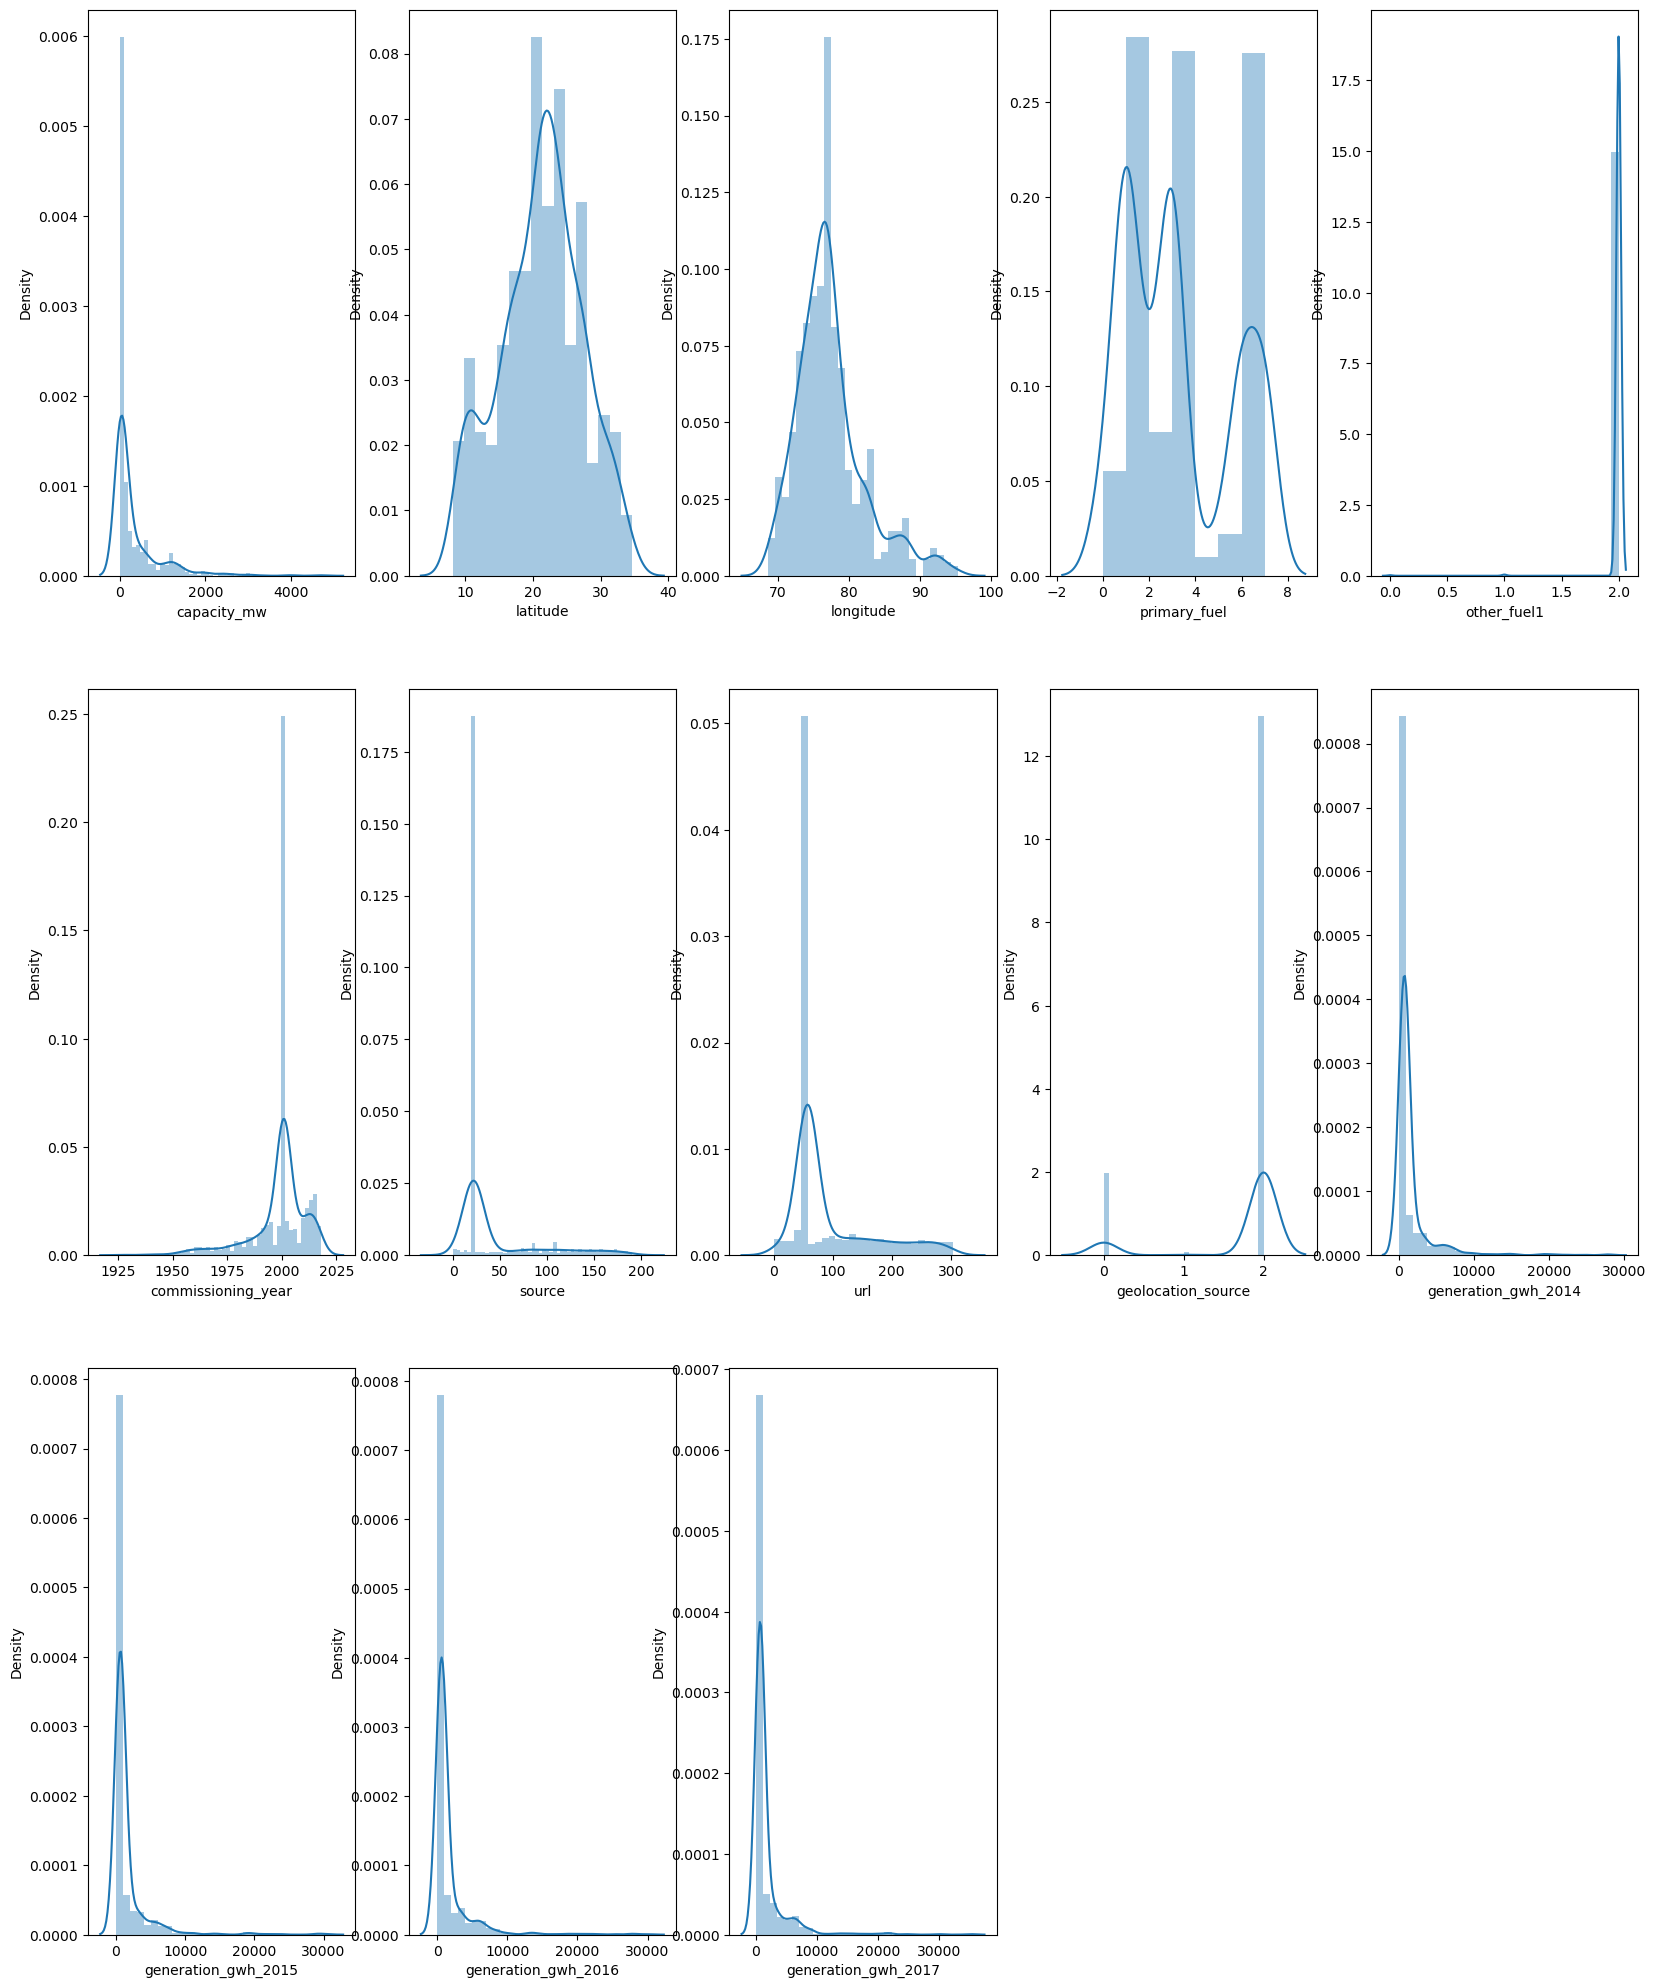

In [208]:
#lets see how our data point are distributed
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber = 1

for column in df_new:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

majority of our features data are normally distributed

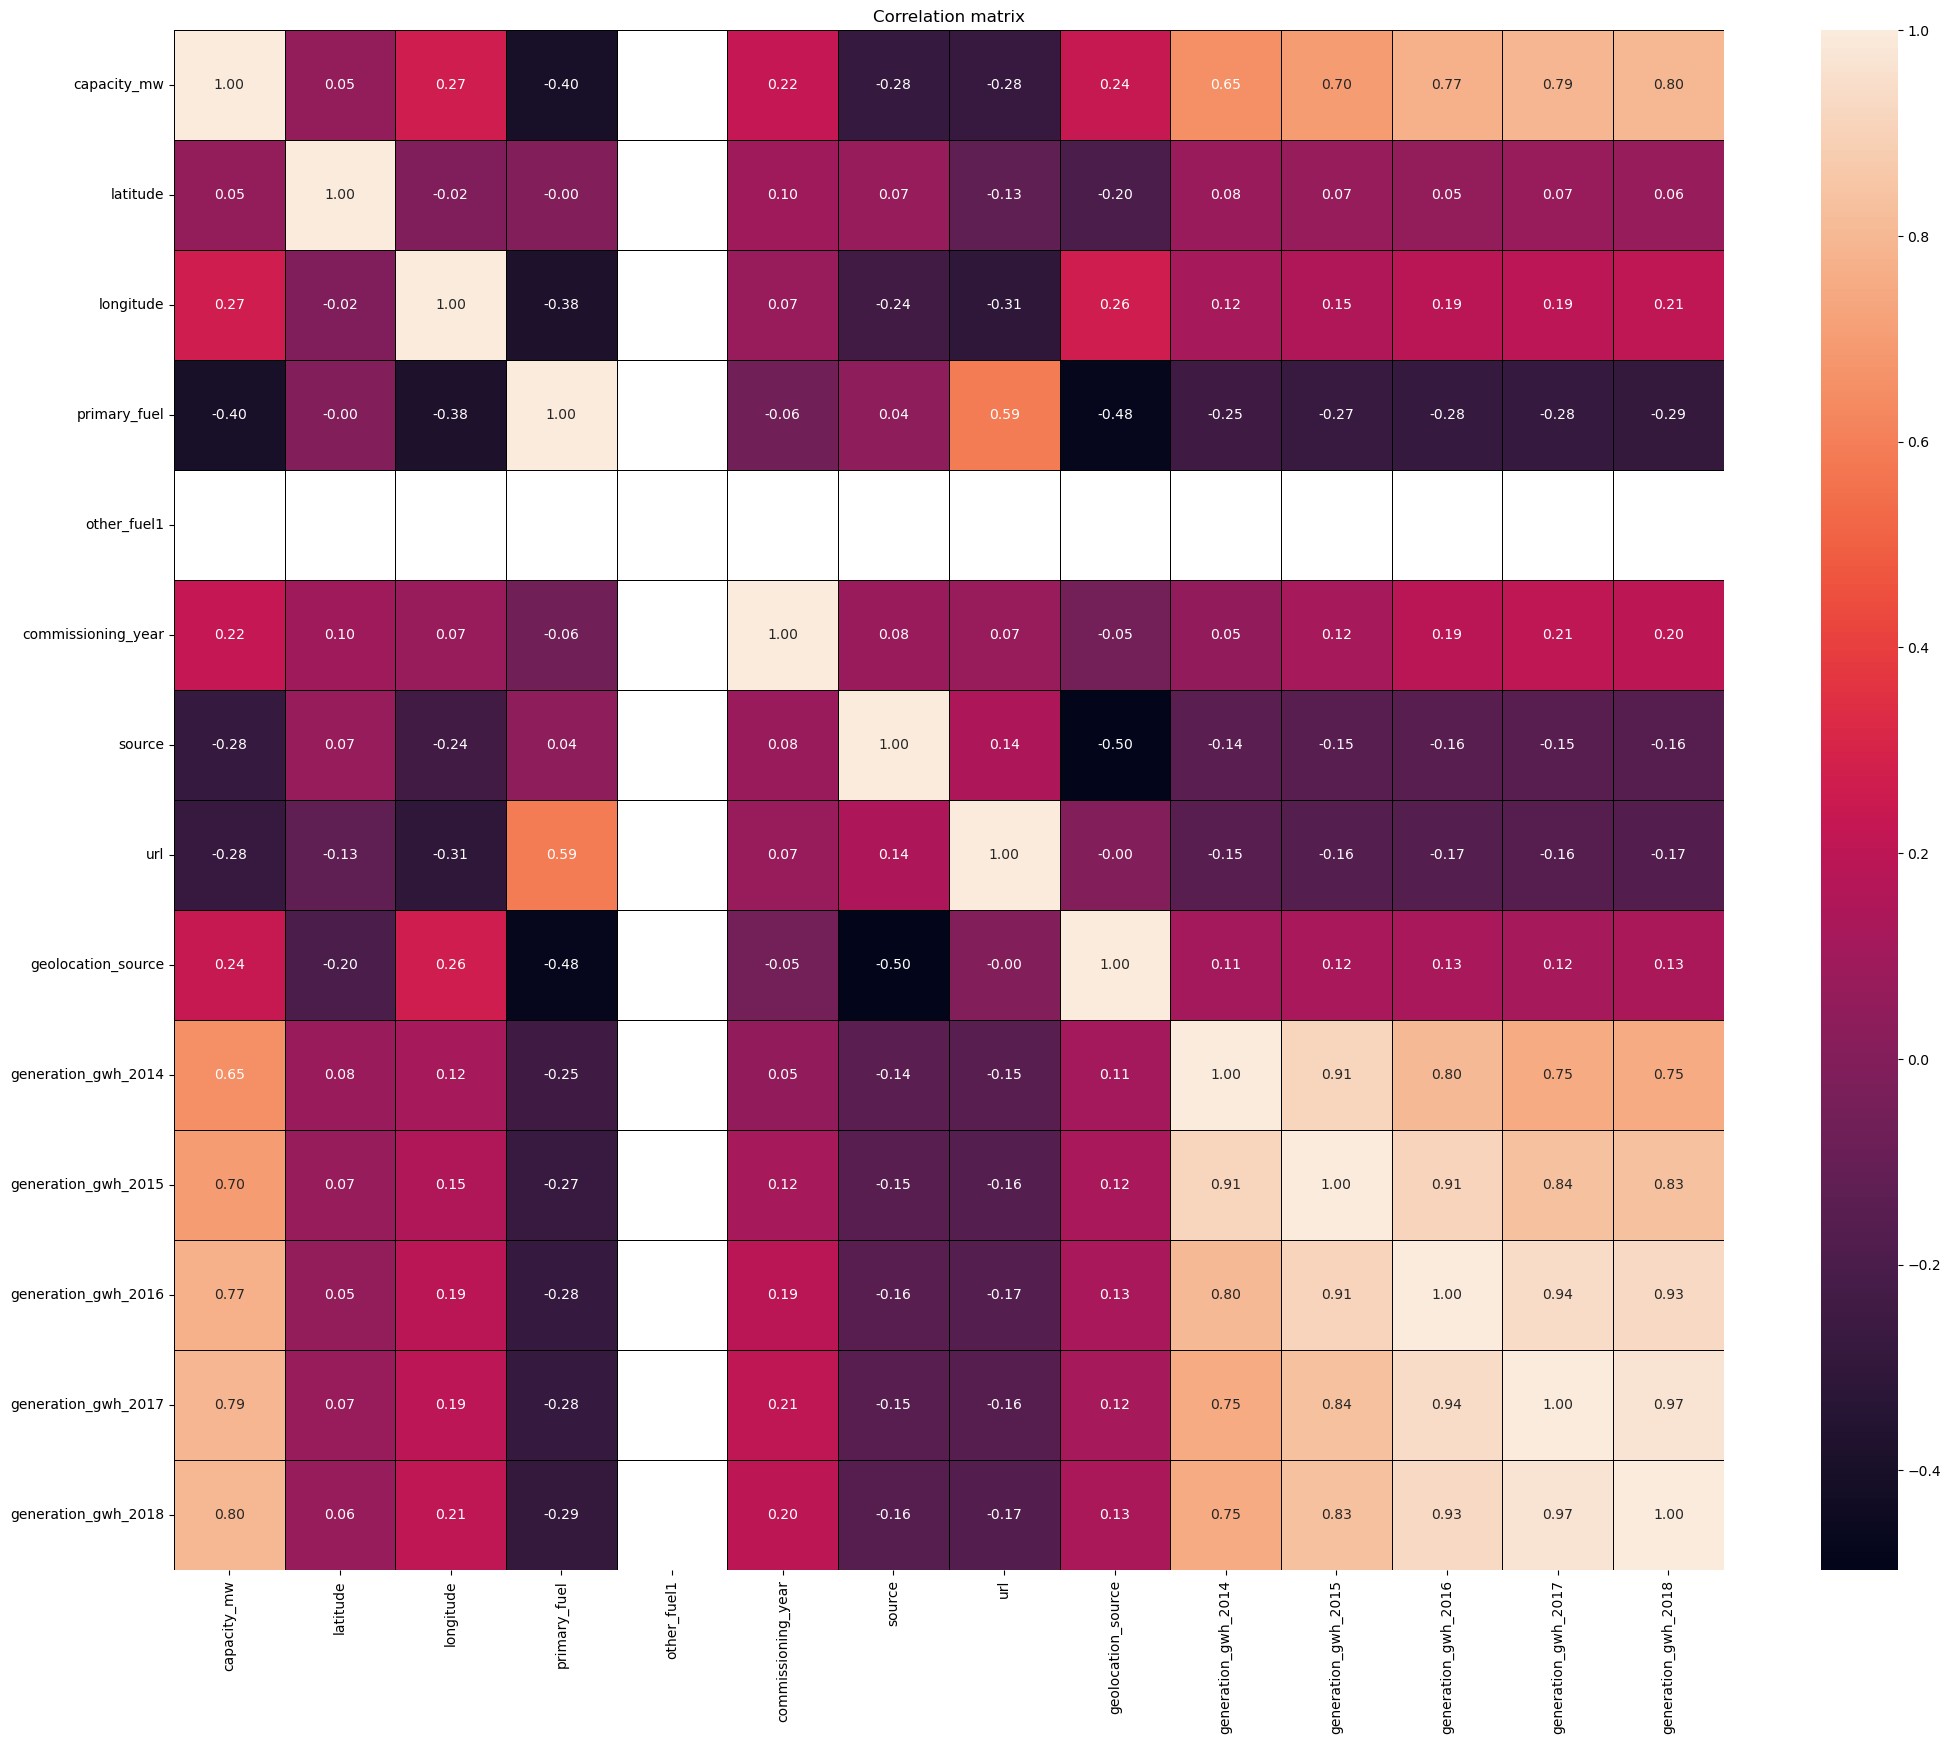

In [209]:
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

This heatmap shows the correlation matrix. We can visualize the relation between the feature to feature and feature to label.This heatmap contains both positive and negative correlation.

the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

In [228]:
# Dropping irrelavant columns
df_new.drop("other_fuel1",axis=1,inplace=True)
df_new.drop("latitude",axis=1,inplace=True)

In [229]:
df_new.skew()

capacity_mw            0.016225
longitude              0.000090
primary_fuel           0.406918
commissioning_year    -0.319963
source                -0.166906
geolocation_source    -2.024131
generation_gwh_2014    0.238132
generation_gwh_2015    0.174247
generation_gwh_2016    0.159215
generation_gwh_2017    0.133574
generation_gwh_2018    0.143115
dtype: float64

In [230]:
df_skew=["capacity_mw", "longitude","commissioning_year", "source","geolocation_source","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]

In [231]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [232]:
df_new[df_skew] = scal.fit_transform(df_new[df_skew].values)

In [233]:
df_new[df_skew].skew()

capacity_mw           -0.026609
longitude              0.000633
commissioning_year    -0.016354
source                -0.760339
geolocation_source    -2.023267
generation_gwh_2014   -0.104728
generation_gwh_2015   -0.095110
generation_gwh_2016   -0.093075
generation_gwh_2017   -0.064115
generation_gwh_2018   -0.088499
dtype: float64

# Model Building (Regression : 'capacity_mw')

In [234]:
#Separating the features and label
x = df_new.drop("capacity_mw",axis=1)
y = df_new['capacity_mw']

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.920096,1.169529,1.185648,1.470495,-2.428935,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
1,-0.498925,-0.980303,-0.047012,1.877120,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
2,-2.371814,1.599496,-0.047012,-0.466566,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
3,2.427251,-0.550337,0.280763,-0.397627,0.411351,-0.240191,0.124701,0.134284,-0.174109,-0.168892
4,1.259704,-0.980303,1.798568,-0.397627,0.411351,1.401436,2.207867,2.207848,1.960889,2.314028
...,...,...,...,...,...,...,...,...,...,...
838,0.231298,-0.980303,1.963628,-0.397627,0.411351,-0.011181,-2.619014,-0.850555,0.040354,-0.098550
839,0.420610,1.169529,-0.047012,1.134100,-2.431086,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
840,-0.224111,1.599496,-0.047012,-0.466566,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
841,-0.759104,-0.980303,-0.047012,0.854054,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721


# Best Random State

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [238]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.843762236845899 at Random_state 5


In [239]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [240]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

# RandomForestRegressor

In [241]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8389242499301933
MAE: 0.2826307351903384
MSE: 0.16423876275292895
RMSE: 0.40526381870693684


# DecisionTreeRegressor

In [242]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.74755700896767
MAE: 0.36009272832978406
MSE: 0.2574001641763603
RMSE: 0.5073461975578021


# KNeighbors Regressor

In [243]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE:",metrics.mean_absolute_error(y_test,predknn))
print("MSE:",metrics.mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.7159820972962636
MAE: 0.37685329612818846
MSE: 0.2895951061505394
RMSE: 0.538140414901668


# GradientBoosting Regressor

In [244]:
# Checking R2 score for KNN Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8226943049321649
MAE: 0.2974970061023994
MSE: 0.1807874119746093
RMSE: 0.42519102997900754


# BaggingRegressor

In [246]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8191670260280444
MAE: 0.2988331840390936
MSE: 0.1843839553577455
RMSE: 0.42939952882804316


# Checking the cross validation score

In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7714951148926525


In [249]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.6120730443289271


In [250]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.676730833363085


In [251]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7887753566484413


In [252]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7461047111381769


From the above observation, the difference between R2score and the cross validation score we conclude that RandomForestRegressor as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

# Hyper parameter tuning

In [254]:
from sklearn.model_selection import GridSearchCV


In [255]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

grd = GridSearchCV(RandomForestRegressor(),param_grid =grid)
grd.fit(x_train,y_train)
grd.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [259]:
capacity = RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,random_state=18)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.40526381870693684
R2_Score: 84.57997916362407


After tuning the model, the R2 score is increased by 1% and we are getting R2 score as 84.57% for RandomForestRegressor which is  good , now we will save our model

# Saving the model

In [261]:
import pickle
filename = 'GLOBAL_POWERPLANT.pkl'
pickle.dump(capacity,open(filename,'wb'))#saved model

In [262]:
import pickle
loaded_model=pickle.load(open('GLOBAL_POWERPLANT.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.57997916362407


# 2. Prediction for primary_fuel

In [264]:
#Separating features and labels
x1= df_new.drop("primary_fuel",axis=1)
y1 = df_new["primary_fuel"]

In [267]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1),columns = x1.columns)
x1

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.700281,-0.920096,1.185648,1.470495,-2.428935,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
1,0.249576,-0.498925,-0.047012,1.877120,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
2,-0.248834,-2.371814,-0.047012,-0.466566,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
3,0.420215,2.427251,0.280763,-0.397627,0.411351,-0.240191,0.124701,0.134284,-0.174109,-0.168892
4,1.730864,1.259704,1.798568,-0.397627,0.411351,1.401436,2.207867,2.207848,1.960889,2.314028
...,...,...,...,...,...,...,...,...,...,...
838,1.673826,0.231298,1.963628,-0.397627,0.411351,-0.011181,-2.619014,-0.850555,0.040354,-0.098550
839,-1.617283,0.420610,-0.047012,1.134100,-2.431086,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
840,-0.486479,-0.224111,-0.047012,-0.466566,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721
841,0.140466,-0.759104,-0.047012,0.854054,0.411351,-0.011181,-0.019305,-0.019290,-0.006345,-0.027721


In [268]:
y1.value_counts()

1    232
3    220
6    126
7    123
2     65
0     50
5     18
4      9
Name: primary_fuel, dtype: int64

In [269]:
# oversampling the data as our data is imbalanced
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x1,y1)

In [270]:
y1.value_counts()

6    232
1    232
7    232
2    232
3    232
0    232
5    232
4    232
Name: primary_fuel, dtype: int64

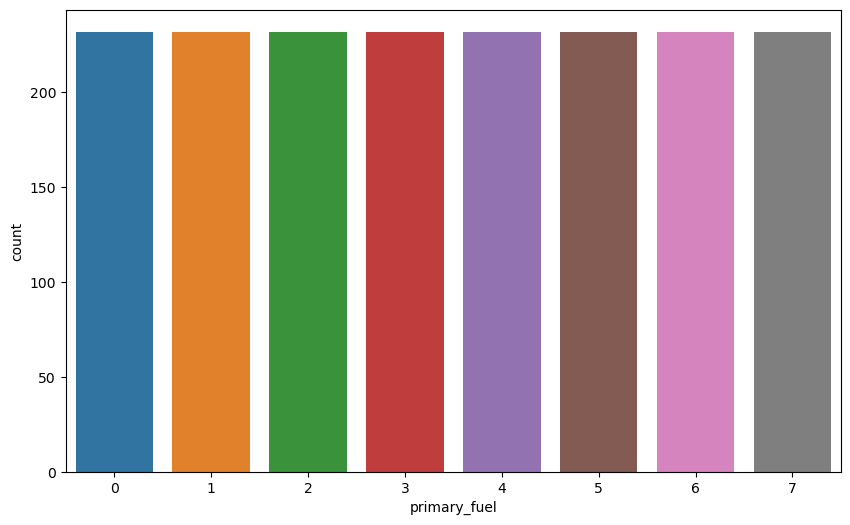

In [272]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y1)
plt.show()

# Model Building

In [273]:
#Finding best random state:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7576301615798923  on Random_State  49


In [274]:
#Creating train_test Split:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=49)

In [275]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier

In [276]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))
score = cross_val_score(RFC,x1,y1)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(y_test,predRFC)-score.mean())

Acurracy score is-  0.9048473967684022
[[68  0  0  0  0  1  0  0]
 [ 3 49  6  4  2  1  0  1]
 [ 0  8 54  6  0  2  0  0]
 [ 0  6  4 44  1  0  0  0]
 [ 0  2  1  0 79  0  0  0]
 [ 0  1  3  0  0 70  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.74      0.74      0.74        66
           2       0.79      0.77      0.78        70
           3       0.81      0.80      0.81        55
           4       0.96      0.96      0.96        82
           5       0.95      0.93      0.94        75
           6       1.00      1.00      1.00        61
           7       0.98      1.00      0.99        79

    accuracy                           0.90       557
   macro avg       0.90      0.90      0.90       557
weighted avg       0.90      0.90      0.90       557

cross vallidation sccore is -  [0.8844086  0.90566038 0.92722372 0.92183288 0.90566038]
CV me

# Support Vector Machine Classifier

In [277]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
score = cross_val_score(svc,x1,y1)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

Acurracy score is-  0.8384201077199281
[[67  0  0  0  0  2  0  0]
 [11 34  7  5  4  1  0  4]
 [ 0  5 46  2  4 11  0  2]
 [ 0  6  9 33  3  0  0  4]
 [ 0  0  1  0 81  0  0  0]
 [ 2  5  0  0  0 66  0  2]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        69
           1       0.68      0.52      0.59        66
           2       0.73      0.66      0.69        70
           3       0.82      0.60      0.69        55
           4       0.88      0.99      0.93        82
           5       0.82      0.88      0.85        75
           6       1.00      1.00      1.00        61
           7       0.87      1.00      0.93        79

    accuracy                           0.84       557
   macro avg       0.83      0.83      0.82       557
weighted avg       0.83      0.84      0.83       557

cross validation score is-  [0.80376344 0.81401617 0.81940701 0.79245283 0.79514825]
cv mean 

# Gradient Boosting Classifier

In [278]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))
score = cross_val_score(GB,x1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

Acurracy score is-  0.9084380610412927
[[68  1  0  0  0  0  0  0]
 [ 4 53  3  3  3  0  0  0]
 [ 0  7 56  4  0  2  0  1]
 [ 0  4  7 43  1  0  0  0]
 [ 0  0  2  0 80  0  0  0]
 [ 0  4  4  0  0 66  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        69
           1       0.77      0.80      0.79        66
           2       0.78      0.80      0.79        70
           3       0.86      0.78      0.82        55
           4       0.95      0.98      0.96        82
           5       0.97      0.88      0.92        75
           6       1.00      1.00      1.00        61
           7       0.98      1.00      0.99        79

    accuracy                           0.91       557
   macro avg       0.91      0.90      0.90       557
weighted avg       0.91      0.91      0.91       557

cross validation score is-  [0.87634409 0.91105121 0.92183288 0.90566038 0.90026954]
CV mean 

# BaggingClassifier

In [280]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

score = cross_val_score(BC,x1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

Acurracy score is-  0.8868940754039497
[[67  1  0  0  0  1  0  0]
 [ 2 51  1  6  3  2  1  0]
 [ 0 11 54  1  1  2  0  1]
 [ 0  8  8 37  2  0  0  0]
 [ 0  1  1  0 80  0  0  0]
 [ 1  4  2  2  0 65  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.67      0.77      0.72        66
           2       0.82      0.77      0.79        70
           3       0.80      0.67      0.73        55
           4       0.93      0.98      0.95        82
           5       0.93      0.87      0.90        75
           6       0.98      1.00      0.99        61
           7       0.98      1.00      0.99        79

    accuracy                           0.89       557
   macro avg       0.88      0.88      0.88       557
weighted avg       0.89      0.89      0.89       557

cross validation score is-  [0.87903226 0.87331536 0.89487871 0.91105121 0.90296496]
CV mean 

# Extra TreeClassifier

In [281]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

score = cross_val_score(ET,x1,y1)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

Acurracy score is-  0.9317773788150808
[[69  0  0  0  0  0  0  0]
 [ 5 54  1  3  0  1  0  2]
 [ 0  7 59  3  0  1  0  0]
 [ 0  4  4 46  1  0  0  0]
 [ 0  0  0  1 81  0  0  0]
 [ 0  2  2  0  0 70  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       0.81      0.82      0.81        66
           2       0.89      0.84      0.87        70
           3       0.87      0.84      0.85        55
           4       0.99      0.99      0.99        82
           5       0.97      0.93      0.95        75
           6       1.00      1.00      1.00        61
           7       0.96      1.00      0.98        79

    accuracy                           0.93       557
   macro avg       0.93      0.93      0.93       557
weighted avg       0.93      0.93      0.93       557

cross validation score is-  [0.89516129 0.9245283  0.92991914 0.92991914 0.91374663]
cv mean 

# DecisionTreeClassifier

In [282]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

score = cross_val_score(DT,x1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predDT)-score.mean())

Acurracy score is-  0.881508078994614
[[66  2  0  0  0  1  0  0]
 [ 2 47  5  7  3  2  0  0]
 [ 0  9 52  6  0  2  0  1]
 [ 0  5  7 41  2  0  0  0]
 [ 0  2  1  1 77  1  0  0]
 [ 0  2  4  0  0 68  0  1]
 [ 0  0  0  0  0  0 61  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.70      0.71      0.71        66
           2       0.75      0.74      0.75        70
           3       0.75      0.75      0.75        55
           4       0.94      0.94      0.94        82
           5       0.92      0.91      0.91        75
           6       1.00      1.00      1.00        61
           7       0.98      1.00      0.99        79

    accuracy                           0.88       557
   macro avg       0.88      0.88      0.88       557
weighted avg       0.88      0.88      0.88       557

cross validation score is-  [0.84677419 0.85983827 0.88140162 0.87331536 0.85983827]
CV mean s

from the above model prediction we can conclude that extratree classifier  is our best model as the Difference between Accracy score and cross validation score is 0.01 and accuracy score is 93%
we wil tune it to obtain greater accuracy

# Hyper parameter tuning

In [284]:
from sklearn.model_selection import GridSearchCV
ET = ExtraTreesClassifier()
et_para = {'criterion': ['gini','entropy'],
            'n_estimators': [200,300,400,500],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
et_tuning = GridSearchCV(estimator = ET, param_grid = et_para, cv=5)

et_tuning.fit(x_train,y_train)
et_tuning.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_split': 2,
 'n_estimators': 400}

In [300]:
FINAL_MODEL = ExtraTreesClassifier(criterion='entropy',n_estimators= 400,max_depth=40,min_samples_split=2)
FINAL_MODEL.fit(x_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=40, n_estimators=400)

In [301]:
finalmod_pred = FINAL_MODEL.predict(x_test)
finalmod_acc = (accuracy_score(y_test, finalmod_pred))*100
print("Accuracy score for the Best Model is:", finalmod_acc)

Accuracy score for the Best Model is: 92.81867145421903


# Saving the model

In [302]:
import pickle
filename = 'GLOBAL_POWERPLANT_fuel_type.pkl'
pickle.dump(capacity,open(filename,'wb'))#saved model